# <a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-0974-4"> Variant Effect Predictor</a>

#### Variant effect predictor https://www.ensembl.org/info/docs/tools/vep/index.html is a publicly available tool to determine the effect of variants on genes transcripts and portein sequence as well as regulatory regions.



## AS THE FIRST THING WE WILL NEED TO TRANSLATE THE VARIANTS ID INTO RSID 

#### For the first step we need to convert our variants id in rsid. In order to do this we will import a function from a script (IdConverting.py) that is an id mapper between our format and rsid.

In [2]:
from IdConverting import ConvertVariants
import pandas as pd
import requests

In [3]:
variants=['1_154453788_C_T', '1_154422736_C_A']

In [4]:
rsid_variants=ConvertVariants(variants)

#### This type of request is different compared to the one we saw earlier, it is a post request: a method to "upload" something on the site. In case of VEP we need to upload the data in json format  (practically a python dictionary) starting from the list of variant that we have and the result will be in json as well

In [6]:
http="https://rest.ensembl.org/vep/human/id/"
headers={ "Content-Type" : "application/json", "Accept" : "application/json"}
response = requests.post(http, headers=headers ,data="{" + '"ids" : {}'.format(str(rsid_variants).replace("'",'"'))+"}")
results=response.json()

### If we break down the function

In [7]:
"{" + '"ids" : {}'.format(str(rsid_variants).replace("'",'"'))+"}"

'{"ids" : ["rs4129267", "rs4133213"]}'

In [8]:
results

[{'transcript_consequences': [{'gene_symbol': 'IL6R',
    'biotype': 'protein_coding',
    'gene_symbol_source': 'HGNC',
    'gene_id': 'ENSG00000160712',
    'variant_allele': 'G',
    'impact': 'MODIFIER',
    'strand': 1,
    'transcript_id': 'ENST00000344086',
    'hgnc_id': 'HGNC:6019',
    'consequence_terms': ['intron_variant']},
   {'gene_id': 'ENSG00000160712',
    'gene_symbol_source': 'HGNC',
    'biotype': 'protein_coding',
    'variant_allele': 'T',
    'gene_symbol': 'IL6R',
    'hgnc_id': 'HGNC:6019',
    'consequence_terms': ['intron_variant'],
    'impact': 'MODIFIER',
    'transcript_id': 'ENST00000344086',
    'strand': 1},
   {'gene_symbol': 'IL6R',
    'variant_allele': 'G',
    'gene_id': 'ENSG00000160712',
    'gene_symbol_source': 'HGNC',
    'biotype': 'protein_coding',
    'strand': 1,
    'transcript_id': 'ENST00000368485',
    'impact': 'MODIFIER',
    'consequence_terms': ['intron_variant'],
    'hgnc_id': 'HGNC:6019'},
   {'variant_allele': 'T',
    'gene_

#### The results are not quite understandable! In order to visualize them we will need to work with Json format, sometime this can be trival but some other time (as in our case) is more difficult because it  can be very complex nested data shape 


#### In this case we will try to visualize the overall effect of our variants on genes and if there are some severe effects know wich genes are affected 

In [9]:
severe_effects=['transcript_ablation','splice_acceptor_variant','splice_donor_variant','stop_gained',
                            'frameshift_variant','stop_lost','start_lost','missense_variant']

In [10]:
severe_consequences=[]
consequences=[]
for i,effect in enumerate(results):
    for consequence in effect['transcript_consequences']:
        for term in consequence['consequence_terms']:
            if term in severe_effects:
                severe_consequences.append((consequence['gene_symbol'],term,effect['input']))
                consequences.append(term)
            else:
                consequences.append(term)

### Finally we will make a pie chart to visualize better the results


In [11]:
from collections import Counter  #To count the occurencies of a list and organize the data to be visualized 
import matplotlib.pyplot as plt

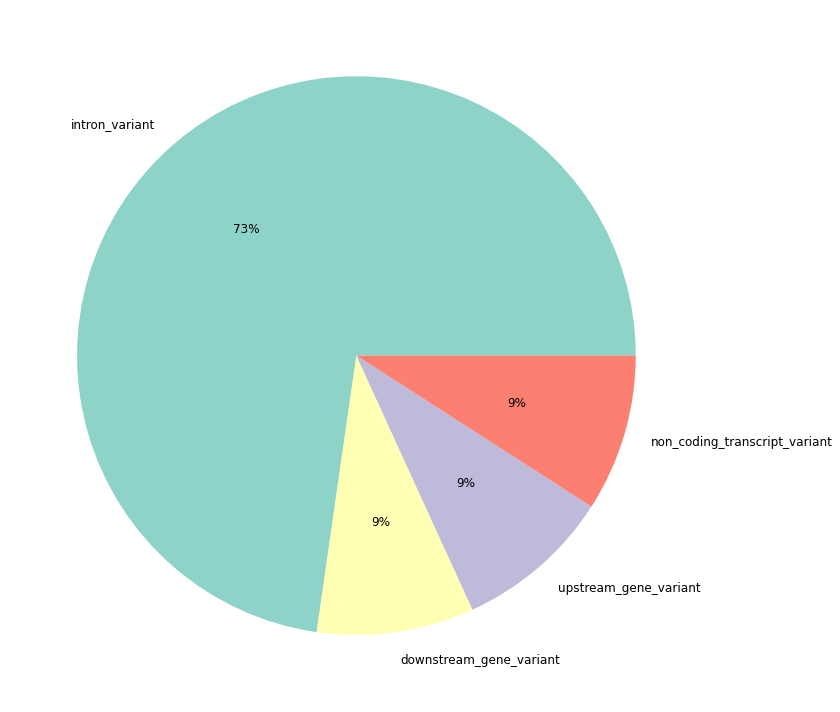

In [15]:
fig,ax=plt.subplots(figsize=(15,10))
cmap = plt.get_cmap("Set3")
data=dict(Counter(consequences))
ax.pie(data.values(),
      labels=data.keys(),
      colors = cmap.colors,
       autopct='%.0f%%',
    textprops={'fontsize': 12}
      )
plt.tight_layout()
plt.show()

## Wrap everything in a function that takes as argument a list of variants and gives as output a pie chart and if there some severe consequence print a warning (that reports the name of the gene and the type of consequence)